# Research of advertisements for the sale of apartments

Initial data: archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. It is necessary to define the parameters for calculating the market value of real estate objects. 


In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

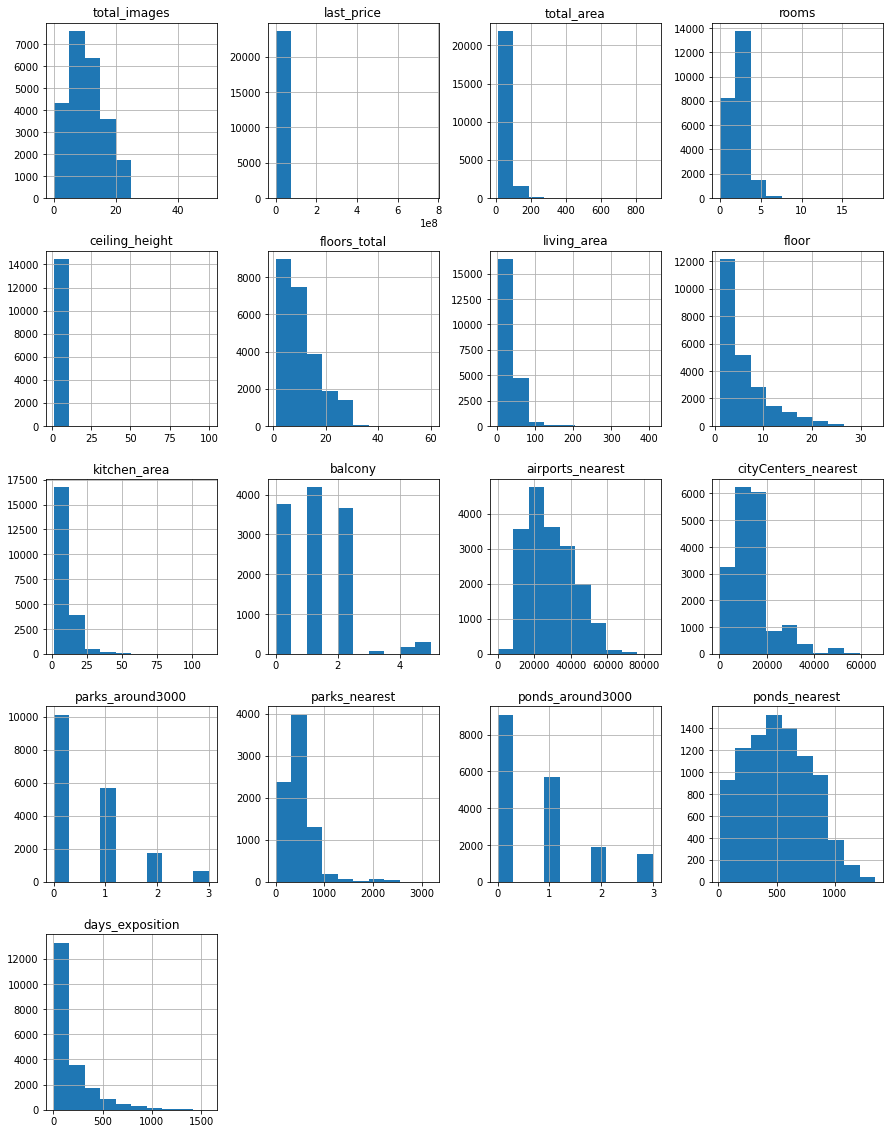

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

pd.set_option('display.max_columns', None) 

display(data.head(10)) 

data.info() 


data.hist(figsize=(15, 20))



By examining general information about the source dataframe, you can find the following data problems:
- gaps in the data in 13 columns out of 20;
- incorrect data type in columns containing numeric values and date;
- duplicates in the locality_name column: the locality type "village" has a different spelling;
Analysis of the obtained histograms showed:
- abnormal values of total and living area (more than 200 sq.m.), kitchen area (more than 30 sq.m.)
- abnormal values in the day's exposition column that are greater than 500 days from the date of publication.

Gaps, duplicates, and anomalous values in the columns affect the correctness of the analysis and the accuracy of plotting. In this regard, before starting to conduct an exploratory data analysis, it is necessary to reprocess the initial data. 

### Предобработка данных

In [3]:
#количество строк датасета до начала предобработки:
data_old = data.shape[0]
## найдем пропуски в данных
# определим столбцы, в которых есть пропуски
#display(data.isna().sum())

#получим таблицу, которая отображает долю пропусков в каждом столбце
#display(pd.DataFrame(round(data.isna().mean()*100, 1)).style)



In [4]:

warnings.filterwarnings("ignore")

#заменим типы данных в столбцах,которые содержат цифровые значения на float, 
#так как они будут участвовать в дальнейших математических вычислениях :
data[['last_price','living_area','total_area','ceiling_height','floors_total',
      'kitchen_area','airports_nearest','cityCenters_nearest',
      'parks_around3000','parks_nearest','ponds_around3000', 'ponds_nearest', 'days_exposition']] = data[['last_price','living_area','total_area',
     'ceiling_height','floors_total','kitchen_area','airports_nearest',
      'cityCenters_nearest','parks_around3000','parks_nearest','ponds_around3000', 'ponds_nearest', 'days_exposition']].astype('float')

#заменим тип данных в столбце с датой:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
   
#заменим тип данных в столбце is_apartment на логический, как в этом столбце только два значения True/False:
data['is_apartment'] = data['is_apartment'].astype(bool) 
 

In [5]:
# по результам анализа количества и доли пропусков в столбцах, обработаем пропуски:

# заменим пропуски в столбце ceiling_height медианным значением в зависимости от этажности зданий:
for floors_total in data['floors_total'].unique():
    data.loc[(data['ceiling_height'].isna()) & (data['floors_total'] == floors_total), 'ceiling_height'] = \
    data.loc[data['floors_total'] == floors_total, 'ceiling_height'].median()


In [6]:
# заменим пропуски в столбце living_area значением из столбца total_area, умноженным на коэфициент 
# коэффициент равен отношению медианного значения жилой площади к медианному значению общей площади
k = round(data['living_area'].median() / data['total_area'].median(),1)
data.loc[data['living_area'].isna(), 'living_area'] = data.loc[data['living_area'].isna(), 'total_area'] * k

In [7]:
# заменим пропуски в столбце is_apartment значением False, так как такой вид недвижимости не квартира
data.loc[data['is_apartment'].isna(), 'is_apartment'] = data.loc[data['is_apartment'].isna(), 'is_apartment'] == 'False'

In [8]:
#заменим пропуски в столбце kitchen_area значением, который равняется разности общей площади и жилой площади:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = \
data.loc[data['kitchen_area'].isna(), 'total_area'] - data['living_area']

In [9]:
#заменим  пропуски в столбце balcony на 0  и поменям тип данных на int:
data['balcony'] = pd.to_numeric(data['balcony'], errors='coerce')
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [10]:
#заменим пропуски в столбце locality_name на Unknown:
data['locality_name'] = data['locality_name'].fillna(value='Unknown')

# пропуски в остальных столбцах оставим без измения, так как отстутствиет логической замены.

In [11]:
#выведим на экран результаты замены пропусков:
display(data.head(10))
display(data.info())
display(data.isna().sum())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.75,11.0,18.60,1,True,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.55,5.0,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,2.60,14.0,95.40,9,True,False,False,63.60,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,True,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.66,26.0,10.60,6,True,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,2.75,24.0,42.96,22,True,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.70,27.0,15.43,26,True,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23621 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

None

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             78
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Разбивай, пожалуйста, код на несколько ячеек, чтобы у тебя после стены кода не шла стена выводов. Так будет более наглядно и проще комментировать твой код
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Сделано
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Отличная работа с пропусками и типами данных! Не забывай, что не всегда стоит делать замену, ради замены. Очень важно обоснование. Иногда пропуски можно удалить (если их мало), либо вообще не трогать, если у нас нет возможности подобрать аргументированный способ замены
</div>

In [12]:
#после заполнения пропусков в столбцах, необходимо провести анализ, выявить и удалить анамалии:
# выведим список уникальных значений столбца ceiling_height:
sorted(data['ceiling_height'].unique())

#в столбце ceiling_height  содержатся анамальные значения, так как реальная высота потолков находится в диапозоне от 2 до 6 метров.
# в столбце присутствуют двузначные значения высоты по причине пропуска запятой после целой части числа, поэтому значения больше 10 разделим на 10
data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 10, 'ceiling_height'] / 10

# отфильтруем значения  высоты потолков в диапозоне от 2 до 6 метров:
data = data.query('6 >= ceiling_height >=2')

In [13]:
# отфильтруем значения столбца kitchen_area от 5 до 30 кв. м
data = data.query('30 >=kitchen_area >= 5')

# проверим  значения в столбце last_price и  удалим анамальные значения:
sorted(data['last_price'].unique())
data = data[(data['last_price'] > 12190) & (data['last_price'] <=  400000000)]

In [14]:
# проверим значения в столбце total_area и удалим анамальные значения:
sorted(data['total_area'].unique())
data = data[data['total_area'] < 400]
# обработка неявных дубликатов в столбце locality_name:
data['locality_name'] = data['locality_name'].str.lower()
duplicates = \
['поселок', 'посёлок городского типа', 'поселок городского типа' \
'городской поселок', 'городской посёлок']
name = 'посёлок'
data['locality_name'] = data['locality_name'].replace(duplicates, name, regex=True)

sorted(data['locality_name'].unique())
data.duplicated().sum() 

0

In [15]:
#удалим строки в строке days_exposition, в которых значения больше 730 (2 года):
data = data.drop(index=data.query('days_exposition > 730').index)

#удалим строки с пропусками в столбцах floors_total и ceiling_height:
data = data.drop(index=data.query('floors_total.isna() or ceiling_height.isna()').index)

# удалим строки, в которых жилая площадь не может быть больше чем 90% от общей площади и меньше 10 кв.м:
data = data.drop(index=data.query('total_area * 0.9 >= living_area <= 10').index)




In [16]:
# убедимся, что пропуски в столбцах, в которых это было возможно, обработаны:
display(data.isna().sum())

# выведем на экран количество удаленных данных:
data_new = data.shape[0]
result = (1 - (data_new / data_old))
print(f'Доля удаленных данных составила: {result:.1%}')


total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5256
cityCenters_nearest      5237
parks_around3000         5236
parks_nearest           14656
ponds_around3000         5236
ponds_nearest           13742
days_exposition          3008
dtype: int64

Доля удаленных данных составила: 7.2%


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Диапазоны для аномальных значений подобраны и удалены верно! Ты также верно убрала дубликаты из названия населённых пунктов
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Здесь хорошо бы посмотреть на количество удалённых данных
	
	new_data.shape[0] / old_data.shape[0]
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Сделано
</div>

### Посчитайте и добавьте в таблицу новые столбцы

In [17]:
#посчитаем и добавим в таблицу новый столбец с ценой одного квадратного метра:
data['price_one_meter'] = round(data['last_price'] / data['total_area'], 1)

#посчитаем и добавим  в таблицу день публикации объявления (0 - понедельник, 1 - вторник и т.д.):
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#посчитаем и добавим в таблицу месяц публикации объявления:
data['month_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).month

#посчитаем и добавим в таблицу год публикации объявления
data['year_exposition'] = pd.DatetimeIndex(data['first_day_exposition']).year


In [18]:
#посчитаем и добавим в таблицу тип этажа квартиры (значения — «первый», «последний», «другой»):
# напишем функцию для опреления типа этажа:
def floor_category(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый' 
    if  floor == floors_total:
        return 'последний'
    return 'другой'
    
data['floor_type'] = data.apply(floor_category, axis=1)    

#посчитаем и добавим  в таблицу расстояние в км до центра города (переведем из м в км и округлим до целых):
data['city_center_km'] = round(data['cityCenters_nearest'] / 1000)

data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_meter,weekday_exposition,month_exposition,year_exposition,floor_type,city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,True,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,True,False,False,11.0,2,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,True,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.7,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.65,12.0,14.4,5,True,False,False,9.1,0,посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.8,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.66,26.0,10.6,6,True,False,False,14.4,1,посёлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.7,3,11,2017,другой,19.0


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Все необходимые колонки добавлены. Идём дальше)
</div>

### Проведите исследовательский анализ данных

Text(0, 0.5, 'количество объявлений')

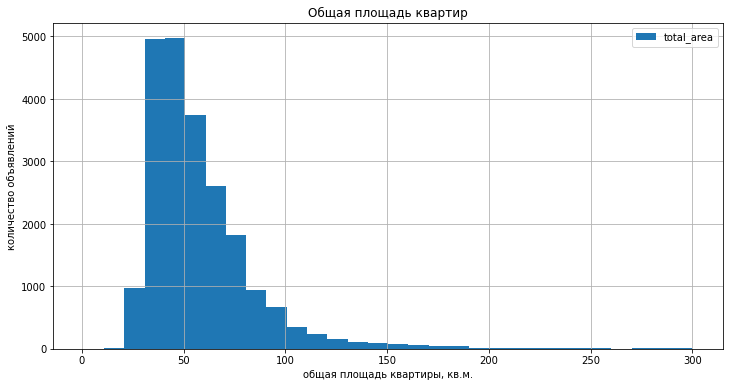

In [19]:
# построим гистограмму по жилой площади:
data.plot(kind='hist',y='total_area', bins=30, range=(1,300), figsize=(12,6),  title='Общая площадь квартир', grid=True)
plt.xlabel('общая площадь квартиры, кв.м.')
plt.ylabel('количество объявлений')


Полученная гистограмма отображает общую площадь квартир, размещенных на продажу. Посмотрев на гистограмму, можно сказать, что большинство продаваемых квартир имеет площадь в диапозоне 30-50 кв.м. Квартиры с общей площадью более 100 кв. м встречаются редко. 



Text(0, 0.5, 'количество объявлений')

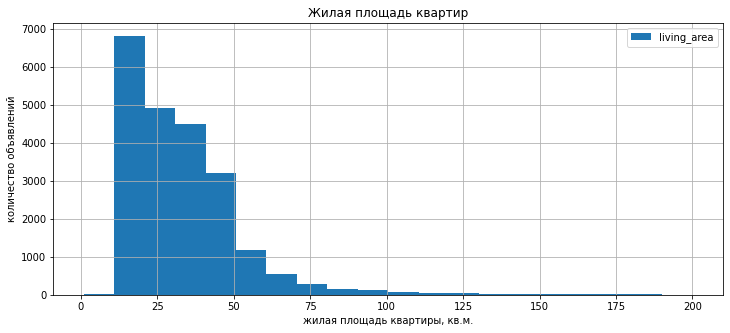

In [20]:
# построим гистограмму по общей площади:
data.plot(kind='hist',y='living_area', bins=20, range=(1,200), figsize=(12,5), title='Жилая площадь квартир', grid=True)
plt.xlabel('жилая площадь квартиры, кв.м.')
plt.ylabel('количество объявлений')


Из гистограммы видно, что большинство квартир продается с жилой площадью от 12,5 до 23 кв.метров. Квартиры с жилой площадью больше 75 кв.м. встречаются редко. 

Text(0, 0.5, 'количество объявлений')

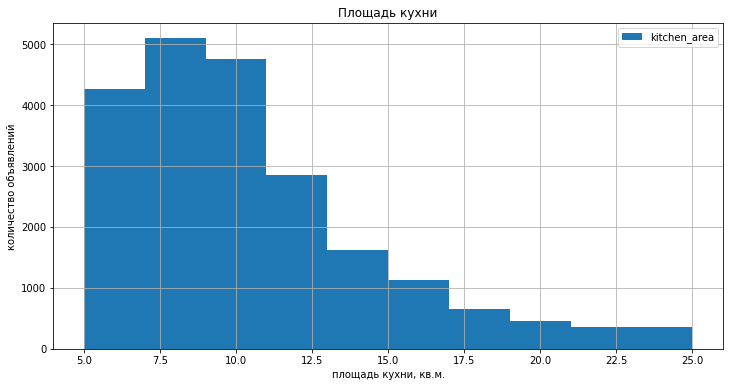

In [21]:
# построим гистограмму по площади кухни:
data.plot(kind='hist',y='kitchen_area', bins=10, range=(5,25), figsize=(12,6), title='Площадь кухни', grid=True)
plt.xlabel('площадь кухни, кв.м.')
plt.ylabel('количество объявлений')


Из гистограммы видно, что большинство квартир продается с площадью кухни  от 7 до 9,5 кв.метров. Квартиры с площадью кухни более 15 кв. м. встречаются редко.

Text(0, 0.5, 'количество объявлений')

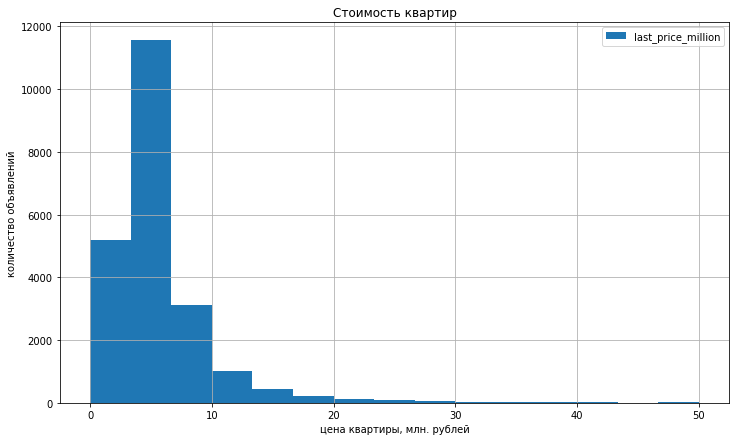

In [22]:
# построим гистограмму по цене объекта недвижимости, но перед этим переведем рубли в млн. рубли:
data['last_price_million'] = (data['last_price']) / 1000000
data.plot(kind='hist',y='last_price_million', bins=15, range=(0,50),figsize=(12,7), title='Стоимость квартир', grid=True)
plt.xlabel('цена квартиры, млн. рублей')
plt.ylabel('количество объявлений')



<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Разделить все значения на 1 млн - хорошее решение
</div>

Из гистограммы видно, что большинство квартир продается стоимостью от 3,5-4,5 млн. рублей. Квартиры со стоимостью более 10 млн.рублей встречаются редко. Но также встречаются выбросы: это цена квартир более 40 млн. рублей. 

Text(0, 0.5, 'количество объявлений')

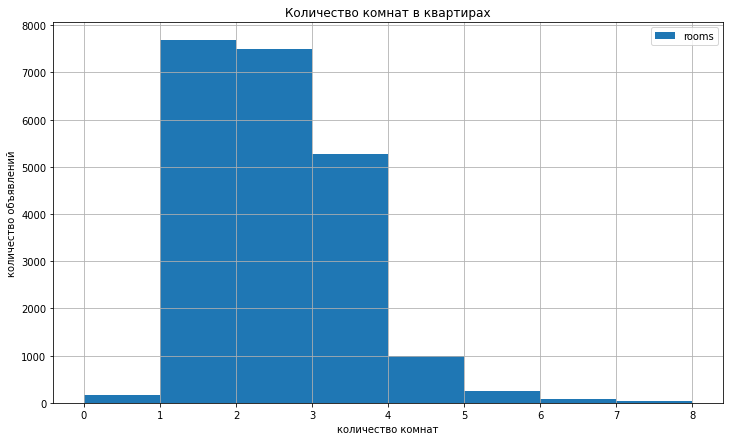

In [23]:
# построим гистограмму по количеству комнат в продаваемых квартирах:
data.plot(kind='hist',y='rooms', bins=8, range=(0,8),figsize=(12,7), title='Количество комнат в квартирах', grid=True)
plt.xlabel('количество комнат')
plt.ylabel('количество объявлений')


Согласно гистограмме, большинство продаваемых квартир - это 1-2 комнатные. Четырех и более комнатные встречаются редко.

Text(0, 0.5, 'количество объявлений')

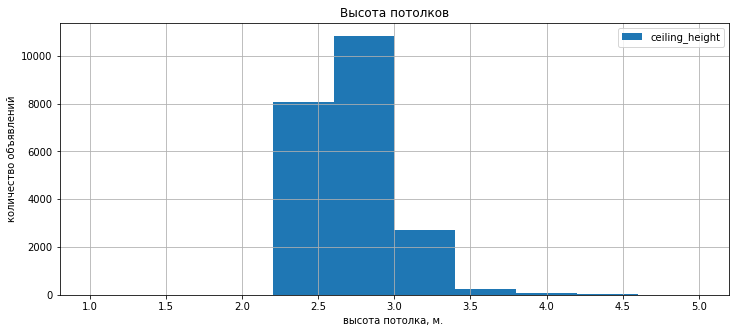

In [24]:
# Построим гистограмму по высоте потолков:
data.plot(kind='hist',y='ceiling_height', bins=10, range=(1,5),figsize=(12,5), title='Высота потолков', grid=True)
plt.xlabel('высота потолка, м. ')
plt.ylabel('количество объявлений')


Согласно гистограмме, большинство продаваемых квартир имеют высоту потолков от 2.7 до 3 м. Квартиры с высотой потолков выше 3,5 м встечаются редко.

Text(0, 0.5, 'количество объявлений')

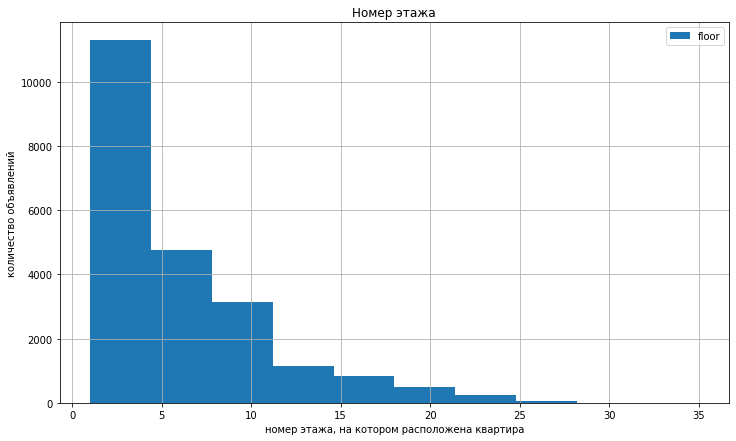

In [25]:
# построим гистограмму по номеру этажа, на котором расположена квартира:
data.plot(kind='hist',y='floor', bins=10, range=(1,35),figsize=(12,7), title='Номер этажа', grid=True)
plt.xlabel('номер этажа, на котором расположена квартира')
plt.ylabel('количество объявлений')


Согласно гистограмме, большинство продаваемых квартир, расположены на 1-4 этажах. Квартиры на 10 этаже и выше встечаются редко.

Text(0, 0.5, 'количество объявлений')

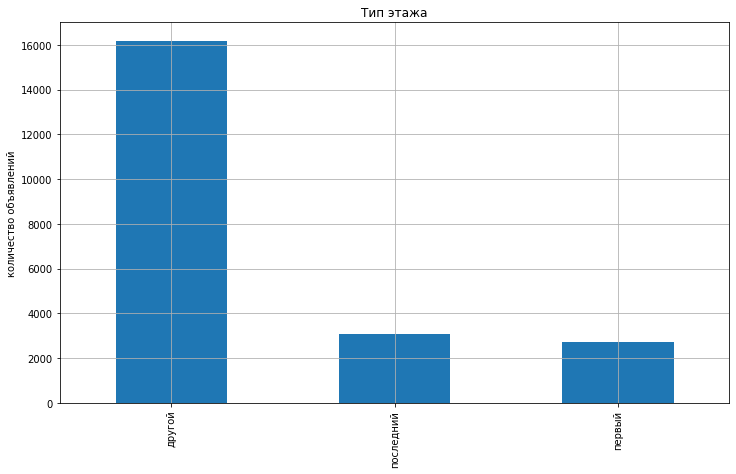

In [26]:
# построим столбчатую диаграмму по типу этажа квартиры («первый», «последний», «другой»):
data['floor_type'].value_counts().plot(kind = 'bar', ylabel = 'frequency', title='Тип этажа', figsize=(12,7), grid=True)
plt.ylabel('количество объявлений')

Для такого типа данных гистограмма не подходит, поэтому построили столбчатую диаграмму. 
Из диаграммы видно, что чаще всего продаваемые квартиры находятся ни на первом, ни на последнем этаже. Количество таких квартир около 16 тыс. При этом квартир, расположенных на последнем этаже, продается несколько большее количество, чем на первом. Однако количество квартир, находящихся на этих двух этажах не привышает 3 тыс. 

Text(0, 0.5, 'количество объявлений')

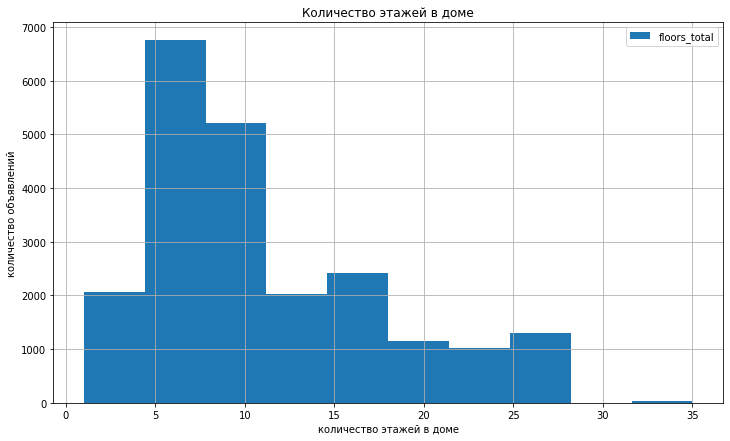

In [27]:
# построим гистограмму общего количества этажей в доме, в котором продаются:
data.plot(kind='hist',y='floors_total', bins=10, range=(1,35),figsize=(12,7), title='Количество этажей в доме', grid=True)
plt.xlabel('количество этажей в доме')
plt.ylabel('количество объявлений')


 Согласно гистограмме, большинство продаваемых квартир расположены 5-9 этажных домах. На гистограмме также видны выбросы - редко встречающая этажность домов - от 32 до 35 этажей.

Text(0, 0.5, 'количество объявлений')

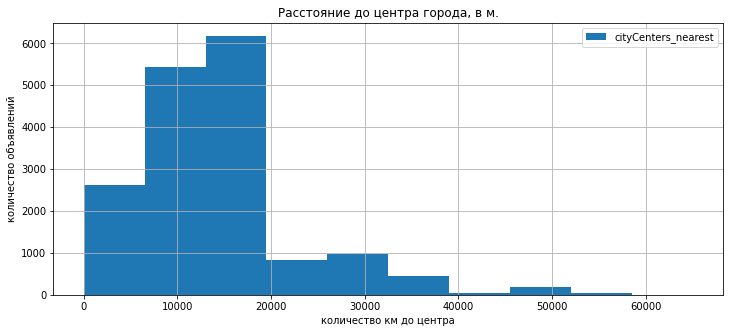

In [28]:
# построим гистограмму расстояния квартиры до центра города в метрах:
data.plot(kind='hist',y='cityCenters_nearest', bins=10, range=(0,65000),figsize=(12,5), title='Расстояние до центра города, в м.', grid=True)
plt.xlabel('количество км до центра')
plt.ylabel('количество объявлений')

Согласно гистограмме, большинство продаваемых квартир расположены на расстоянии от 15 тыс. м до 20 тыс. м (15-20 км) от центра города. Квартиры, расположенные более чем 20 000 м (20 км) от центра города встречаются редко. Также встречаются единичные квартиры удаленные от центра более чем на 60 000 м от центра города.



Text(0, 0.5, 'количество объявлений')

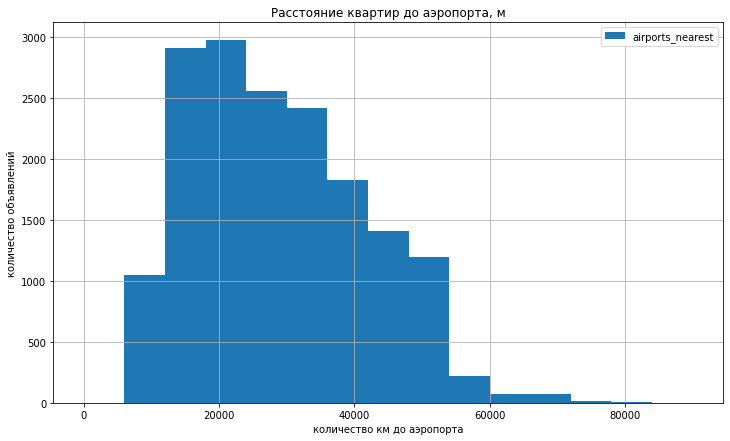

In [29]:
# построим гистограмму расстояния до ближайшего аэропорта:
data.plot(kind='hist',y='airports_nearest', bins=15, range=(0,90000),figsize=(12,7), title='Расстояние квартир до аэропорта, м', grid=True)
plt.xlabel('количество км до аэропорта')
plt.ylabel('количество объявлений')

Согласно гистограмме, большинство продаваемых квартир расположены на расстоянии от 18 тыс. м до 22 тыс. м (18-22 км) от аэропорта. Квартиры, расположенные более чем 60 000 м (60 км) от аэропорта встречаются редко. Также встречаются единичные квартиры удаленные от аэропорта более чем на 80 000 м  (80 км) от аэропорта.

Text(0, 0.5, 'количество объявлений')

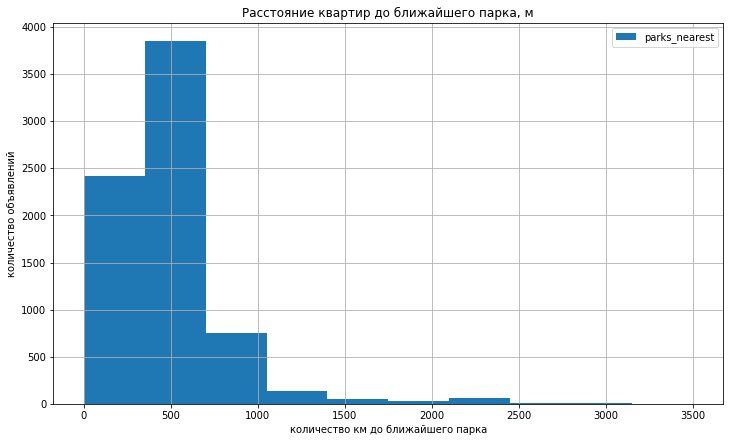

In [30]:
# построим гистрограммы расстояния до ближайшего парка:
data.plot(kind='hist',y='parks_nearest', bins=10, range=(0,3500),figsize=(12,7), title='Расстояние квартир до ближайшего парка, м', grid=True)
plt.xlabel('количество км до ближайшего парка')
plt.ylabel('количество объявлений')

Согласно гистограмме, большинство продаваемых квартир расположены на расстоянии от 450 м до 600 м до ближайшего парка. Квартиры, расположенные более чем 1000 м 91 км) до ближайшего парка встречаются редко. Также встречаются единичные квартиры удаленные  от парков более чем на 1000 м (1 км).

Text(0, 0.5, 'количество объявлений')

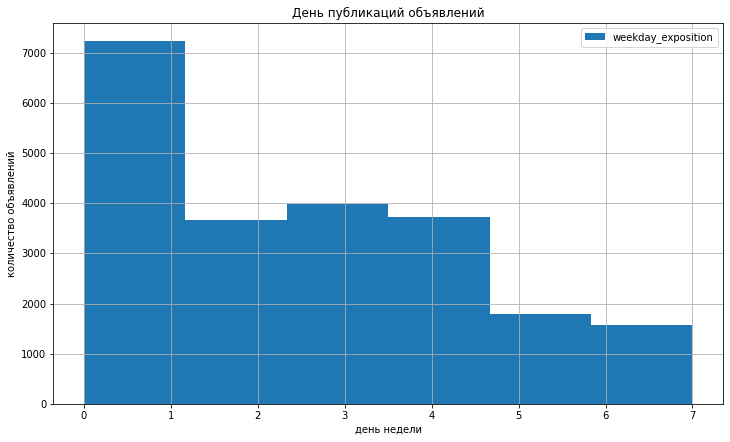

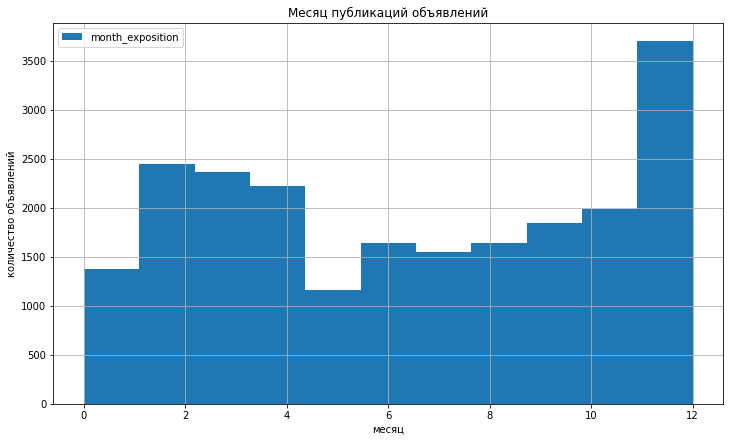

In [31]:
#построим гистограммы  по дню и месяцу публикации объявлений:
data.plot(kind='hist',y='weekday_exposition', bins=6, range=(0,7),figsize=(12,7), title='День публикаций объявлений', grid=True)
plt.xlabel('день недели')
plt.ylabel('количество объявлений')

data.plot(kind='hist',y='month_exposition', bins=11, range=(0,12),figsize=(12,7), title='Месяц публикаций объявлений', grid=True)
plt.xlabel('месяц')
plt.ylabel('количество объявлений')

Согласно гистограмме, большинство объявлений о продажах квартир публикавались по понедельникам и вторникам, в выходные было минимальное количество публикаций.
В зависимости от месяца, большинство объявлений размещались в ноябре-декабре, меньшинство в апреле-мае. 

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Отдельный плюс за то, что ты подписываешь графики 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>По ссылке ниже можно почитать подробнее как подписать оси у графика
    
    https://pyprog.pro/mpl/mpl_axis_signatures.html 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Сделано
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Красота!
</div>

<AxesSubplot:title={'center':'Длительность продажи квартиры'}, ylabel='Frequency'>

count    18978.000000
mean       150.341237
std        155.595071
min          1.000000
25%         43.000000
50%         90.000000
75%        206.000000
max        729.000000
Name: days_exposition, dtype: float64

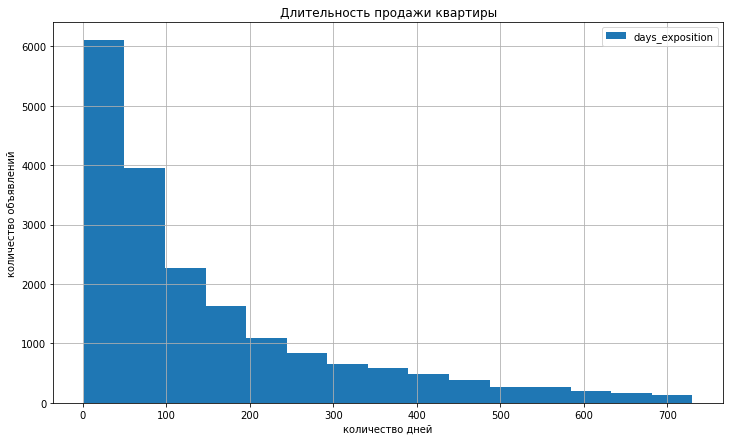

In [32]:
#Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
# Построим гистограмму:
display(data.plot(kind='hist',y='days_exposition', bins=15, range=(1,730),figsize=(12,7), title='Длительность продажи квартиры', grid=True))
plt.xlabel('количество дней')
plt.ylabel('количество объявлений')
# получим среднее и медиану, вызовя метод decribe:
display(data['days_exposition'].describe())



    

<AxesSubplot:>

(-100.0, 600.0)

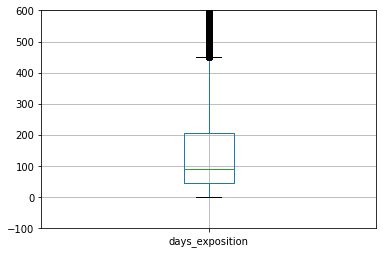

In [33]:
# кроме медианы и среднего для определения самых быстрых и медленных продаж нужно знать характерный разброс
# т.е. какие значения оказались вдали от среднего и насколько их много, для этого построим диаграмму размаха:

display(data.boxplot('days_exposition'))
plt.ylim(-100,600)

Данные в столбце days_exposition неоднородны, так как выборка характеризуется большим средним отклонением (значения в списке отличаются от среднего на 155.6. В  данной связи по среднему значению определение обычного срока продажи некорректно.
Поэтому для определения обычного срока продажи воспользуемся медианой.
Медианная длительность продажи квартиры составляет 90 дней (3 месяца).
Быстрыми продажами считаются значения, меньшие 1 квартиля (25%): продажи меньше 43 дней считаются быстрыми.
Необычно долгими продажами считаются такие, срок продажи которых превышает 4 квартиль - 206 дней.




<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Согласен! Если интересно, то можно посмотреть на диапазон от 0 до 100 дней. Там есть пики, которым можно найти очень логичное объяснение</div>
</div>

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='floor_type'>

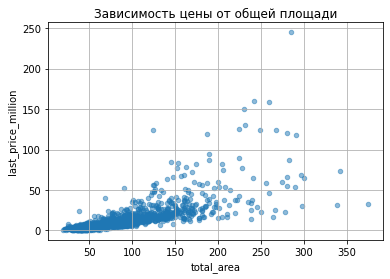

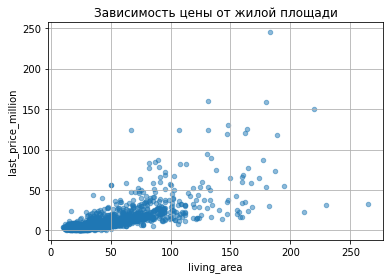

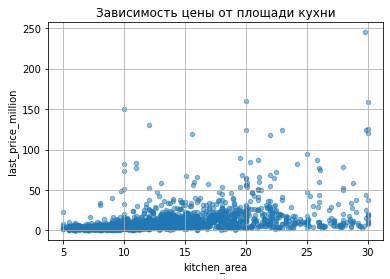

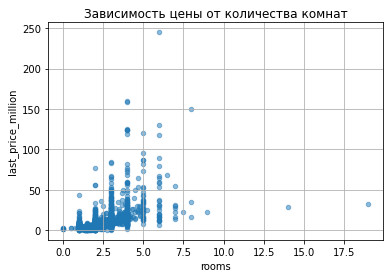

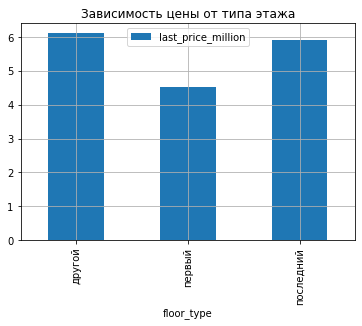

In [34]:
#Найдем факторы, которые больше всего влияют на общую (полную) стоимость квартир.
# На основе сводных таблиц построим графики,отражающие зависимость цены от различных параметров.
# Определение зависимости цены от общей площади:
(data
    .pivot_table(index='last_price_million', values=['total_area']).reset_index()
    .plot(x='total_area', y='last_price_million', kind='scatter', alpha=0.5, grid=True, title='Зависимость цены от общей площади')
)
# Определение зависимости цены от жилой площади:
(data
    .pivot_table(index='last_price_million', values=['living_area']).reset_index()
    .plot(x='living_area', y='last_price_million', kind='scatter', alpha=0.5, grid=True, title='Зависимость цены от жилой площади')
)
# Определение зависимости цены от площади кухни:
(data
    .pivot_table(index='last_price_million', values=['kitchen_area']).reset_index()
    .plot(x='kitchen_area', y='last_price_million', kind='scatter', alpha=0.5, grid=True, title='Зависимость цены от площади кухни')
)
# Определение зависимости цены от количества комнат:
(data
    .pivot_table(index='last_price_million', values=['rooms']).reset_index()
    .plot(x='rooms', y='last_price_million', kind='scatter',alpha=0.5, grid=True, title='Зависимость цены от количества комнат')
)
# Зависимость цены от типа этажа нелинейная, поэтому найдем среднюю цену в зависимости от этажа и построим barplot:
(data.pivot_table(index='floor_type', values=['last_price_million']).reset_index()
    .plot(x='floor_type', y='last_price_million', kind='bar', grid=True, title='Зависимость цены от типа этажа')
)


,last_price_million,total_area,living_area,kitchen_area,rooms
last_price_million,1.00,0.71,0.64,0.37,0.43
total_area,0.71,1.00,0.94,0.44,0.80
living_area,0.64,0.94,1.00,0.31,0.86
kitchen_area,0.37,0.44,0.31,1.00,0.18
rooms,0.43,0.80,0.86,0.18,1.00


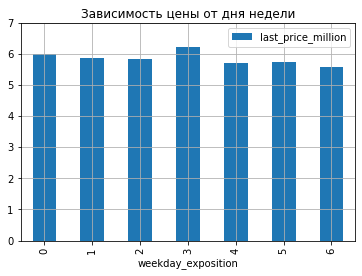

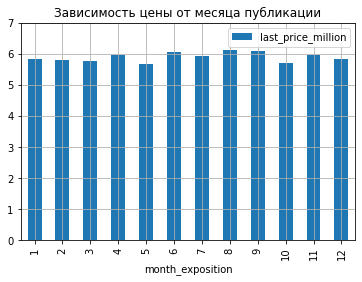

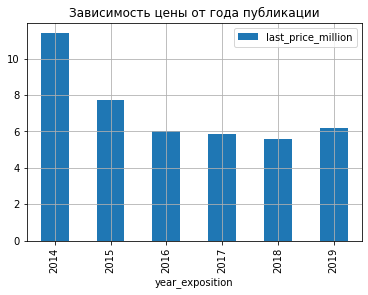

In [35]:
# Зависимость цены от даты публикации также нелинейная, поэтому найдем среднюю цену продажи в зависимости от даты и  построим barplot:
#от дня недели:

(data.pivot_table(index='weekday_exposition', values=['last_price_million']).reset_index()
    .plot(x='weekday_exposition', y='last_price_million', kind='bar', ylim=(0,7), grid=True, title='Зависимость цены от дня недели')
)

#от месяца публикации:

(data.pivot_table(index='month_exposition', values=['last_price_million']).reset_index()
    .plot(x='month_exposition', y='last_price_million', kind='bar',  ylim=(0,7), grid=True, title='Зависимость цены от месяца публикации')
)

#от года публикации:

(data.pivot_table(index='year_exposition', values=['last_price_million']).reset_index()
    .plot(x='year_exposition', y='last_price_million', kind='bar', grid=True, title='Зависимость цены от года публикации')
)

# построим корреляционную матрицу для параметров, для всех пар столбцов, где есть линейная зависимость:
data_table_corr = data[['last_price_million','total_area','living_area','kitchen_area', 'rooms']]
display(data_table_corr.corr().round(2))


Для понимания как цена квартиры зависит от ее параметров построены диаграммы рассеивания. По результатам анализа построенных диаграмм, можно сделать вывод о наличии положительной зависимости цены от общей и жилой площади квартиры, количества комнат и площади кухни. Для числовой оценки тесноты этой взаимосвязи рассчитан коэффициент корреляции Пирсона. Анализ матрицы корреляции показал, что наиболее сильная линейная взаимосвязь стоимости квартир наблюдается от общей площади квартиры и жилой площади. Зависимость цены от количества комнат и площади кухни менее тесная.

Для наглядного представления зависимости цены квартиры от типа этажа и даты публикации (день, месяц, год) построены столбчатые диаграммы. Результаты анализа построенных графиков показали, что стоимость квартир также зависит от этажа: стоимость квартир, расположенных на первом этаже меньше, чем на последнем. При этом цена квартир, находящихся на других этажах выше цены квартир на первом и последнем этажах. Объявления публикуемые по четвергам имеют более высокую стоимость продажи квартир, чем в другие дни недели.

В зависимости от месяца размещения объявления цены квартир отличаются незначительно. Однако в объявлениях, размещенных в июне, августе и сентябре стоимость квартир несколько выше, чем в остальные месяцы.

В зависимости от года размещения объявлений, стоимость продаваемых квартир после максимума в 2014 года в течение четырех последующих лет снижалась, достигнув в 2018 году среднего значения 5,5 млн рублей. В 2019 году стоимость продаваемых квартир вновь начала расти и равнялась чуть больше 6 млн. рублей.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Зависимость цены изучена верно! Ещё тут можно использовать для визуализации pairplot из библиотеки seaborn 
    
    https://seaborn.pydata.org/generated/seaborn.pairplot.html
</div>

,locality_name,count,mean
315,санкт-петербург,14437,112082.65
226,посёлок мурино,517,85436.97
304,посёлок шушары,418,78728.43
4,всеволожск,378,68868.42
309,пушкин,335,102687.95
121,колпино,329,75207.92
236,посёлок парголово,312,90598.30
7,гатчина,287,68887.82
46,деревня кудрово,274,92756.26
5,выборг,222,57996.85


Text(0, 0.5, 'средняя цена')

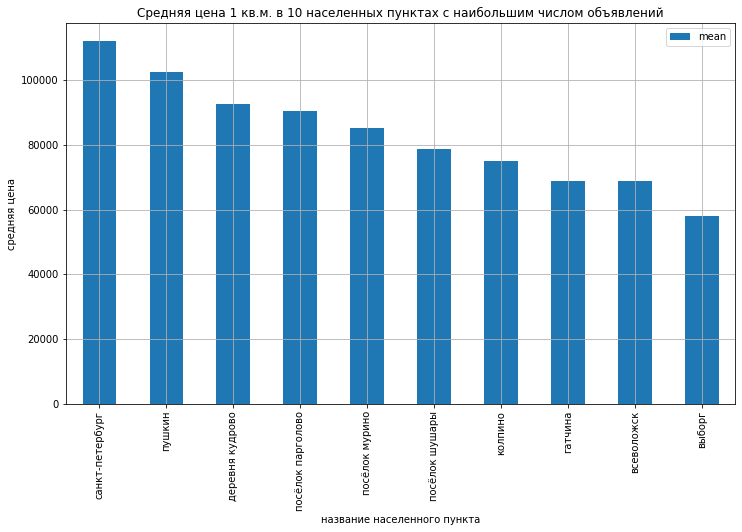

In [36]:
# Посчитаем среднюю цену одного квардатного метра в 10 населенных пунктах с наибольшим числом объвлений:
#сформируем сводную таблицу, содержащую количество объявлений и среднюю цену, в зависимости от населенного пункта:
rating = data.pivot_table(index= 'locality_name', values= 'price_one_meter', aggfunc=['count', 'mean']).reset_index()

# уберем мильтииндекс в названии столбцов:
rating.columns = ['locality_name', 'count','mean']
# отсортируем 10 первых населенных пунктов в полученной таблице по убыванию:
rating = rating.sort_values('count', ascending=False).head(10).round(2)
display(rating)
#отсортируем полученный список по средней цене и выведем диаграмму:
rating_mean = rating.sort_values('mean', ascending=False)
rating_mean.plot(x='locality_name', y='mean', kind='bar', grid=True, figsize=(12,7), title='Средняя цена 1 кв.м. в 10 населенных пунктах с наибольшим числом объявлений')
plt.xlabel('название населенного пункта')
plt.ylabel('средняя цена')

Из полученных выше данных видно, что на первом месте в списке 10 населенных пунктов по числу объявлений является г. Санкт_Петербург.
Средняя цена за 1 кв.м в 10 населененных пунктах с наибоьшим числом объявлений находится в диапозоне от 58 тыс. рублей до 112,1 тыс. рублей. Квартиры с самой высокой стоимостью 1 кв.м находятся в г. Санкт-Петербурге.
Квартиры с самой низкой стоимостью 1 кв.м находятся в г. Выборг


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>👏🏻👏🏻👏🏻 Отличная визуализация!
</div>

Text(0, 0.5, 'расстояние до центра')

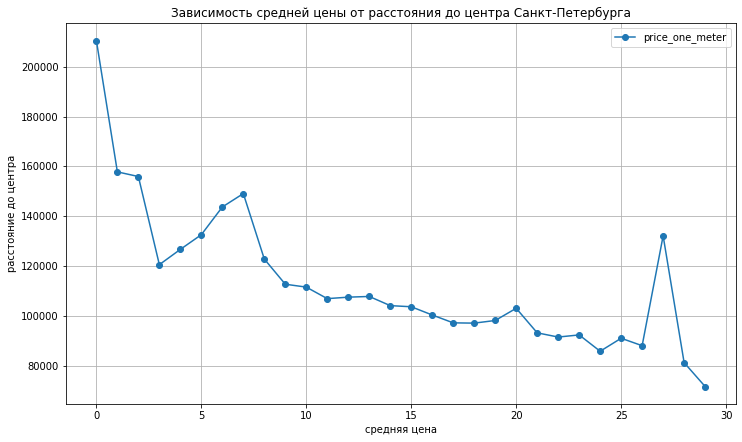

In [37]:
#выделим квартиры только в Санкт-Петербурге, затем сгруппируем по км, найдем среднюю цену за км:
#построим график зависимости средней цены от км до центра:
(data
      .query('locality_name == "санкт-петербург"')
      .pivot_table(index='city_center_km', values='price_one_meter').reset_index().round(2)
      .plot(x='city_center_km', y='price_one_meter', style='o-', grid='True', figsize=(12,7),title='Зависимость средней цены от расстояния до центра Санкт-Петербурга')
)
plt.xlabel('средняя цена')
plt.ylabel('расстояние до центра')


Согласно графику, средняя цена 1 кв. м  зависит от расстояния до центра города. Чем ближе расположение квартиры к центру города, тем выше средняя цена за кв.м. Судя по графику центр города заканчивается примерно на 6 км. В данном диапозоне средняя цена составляет от 145 тыс  до 200 тыс. рублей и выше. 



<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>На каком километре заканчивается центр города на твой взгляд, судя по графику?
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Сделано
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b> 
<br>Абсолютно верно!
</div>

### Общий вывод

В целях проведения исследовательского анализа архива объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населенных пунктах сервиса Яндекс Недвижимость в первую очередь изучены исходные данные и обнаружен ряд проблем:
- пропуски в данных в 13 столбцах из 20;
- неверный тип данных в столбцах, содержащих цифровые значения и даты;
- дубликаты в столбце locality_name: тип населенного пункта "поселок" имеет различное написание.
Кроме того, анализ полученных гистограмм, постоенных по исходным данным показал, что следующее:
- анамальные значения общей  и жилой площади (более 200 кв.м.), площади кухни (более 30 кв.м.)
- анамальные значения в столбце days_exposition, превышающие 500 дней со дня публикации.
Пропуски, дубликаты, анамальные значения в столбцах влияют на корректность проводимого анализа и точность построения графиков. В данной связи перед тем как начать проводить исследовательский анализ данных следующим этапом произведена преобработка исходных данных. 

В процессе преобработки исходных данных найдены различные особенности и зависимости, существующие на рынке недвижимости:
1. Найдены, изучены и заполнены (где возможно) пропущенные значения в столбцах:
- в столбце высота потолка пропуски заполнены медианным значением в зависимости от этажности здания;
- в столбце жилая площадь пропуски заполнены значением, равным произведению коэффициента отношения медианного значения жилой площади к медианному значению общей площади, умноженному на общую площадь;
- в столбце апартаменты с пропущенными значениями проставлен логический признак False, так как это не квартиры;
- в столбце площадь кухни пропуски заменены на значения, равные разности общей и жилой площади;
- в столбце балконы пропуски замены на нулевые значения по причине их отсутствия;
- в столбце названия расположения пропуски заменены на Unknown.
  В остальных столбцах, таких как расстояние до ближайшего аэропорта, до центра города, до ближайшего парка и пруда , парка и пруда  вблизи 3 км и срока публикации заполнить пропуски не представилось возможным из-за отсутствия логической замены.

2. Изменены типы данных в ряде столбцов, содержащих цифровые значения, с object на float так как они будут использоваться в дальнейших математических вычислениях. Тип данных в столбце дата публикации заменен с object на Date.

3. После заполнения пропусков в столбцах, в которых можно было произвести замену, выявлены и удалены аномалии:
- в столбце высота потолка присутствуют двухзначные значения высоты по причине отсутствия запятой после целой части числа, поэтому значения больше 10 разделены на 10. После чего произведена фильтрация данных по высоте потолков в диапазоне от 2 до 6 метров;
- в столбце площадь кухни отфильтрованы данные в диапазоне от 5 до 30 кв.м;
- в столбце цена квартиры удалены аномальные значения превышающие 400 млн рублей, а также артефакт равный 12190 рублей;
- в столбце общей площади удалены строки со значениями, превышающими 400 кв.м.;
- в столбце срок публикации, удалены объявления с момента публикации прошло более 730 дней (2 года);
- в столбцах общее количество этажей и высота потолков удалены оставшиеся пропуски; 
- в столбце жилая площадь удалены объявления, в которых жилая площадь была меньше 10 кв. м или превышала 90% от общей площади;

4. Произведена обработка неявных дубликатов в столбце название расположения. Так, все названия приведены к нижнему регистру и различные варианты написания типа населенного пункта поселок приведены к единообразному виду. 

После фильтрации, удаления аномалий и артефактов доля удаленных данных  по отношению к исходным составила 7.2%.

5. Добавлены в исходную таблицу новые столбцы с ценой одного кв.м, днем, месяцем и годом публикации. А также столбцы с типом этажа (первый, последний, другой) и расстоянием до центра города в км.

6. Проведен непосредственно исследовательский анализ данных в процессе которого построены и описаны гистограммы:
- большинство продаваемых квартир имеет площадь в диапазоне 30-50 кв.м. Квартиры с общей площадью более 100 кв. м встречаются редко;
- большинство квартир продается с жилой площадью от 12,5 до 23 кв.м. Квартиры с жилой площадью больше 75 кв.м. встречаются редко;
- большинство квартир продается с площадью кухни  от 7 до 9,5 кв.м. Квартиры с площадью кухни более 15 кв. м. встречаются редко;
- большинство квартир продается стоимостью от 3,5-4,5 млн. рублей. Квартиры со стоимостью более 10 млн. рублей встречаются редко. Но также встречаются выбросы: это цена квартир более 40 млн. рублей; 
- большинство продаваемых квартир — это 1-2 комнатные. Четырех и более комнатные встречаются редко;
- большинство продаваемых квартир имеют высоту потолков от 2.7 до 3 м. Квартиры с высотой потолков выше 3,5 м встречаются редко.
- большинство продаваемых квартир, расположены на 1–4  этажах. Квартиры на 10 этаже и выше встречаются редко;
- чаще всего продаваемые квартиры находятся ни на первом, ни на последнем этаже. Количество таких квартир около 16 тыс. При этом квартир, расположенных на последнем этаже, продается несколько большее количество, чем на первом. Однако количество квартир, находящихся на этих двух этажах, не превышает 3 тыс.; 
- большинство продаваемых квартир расположены 5–9 этажных домах;
- большинство продаваемых квартир расположены на расстоянии от 15 тыс. м до 20 тыс. м (15–20  км) от центра города. Квартиры, расположенные более чем 20 000 м (20 км) от центра города встречаются редко. Также встречаются единичные квартиры, удаленные от центра более чем на 60 000 м от центра города;
- большинство продаваемых квартир расположены на расстоянии от 18 тыс. м до 22 тыс. м (18-22 км) от аэропорта. Квартиры, расположенные более чем 60 000 м (60 км) от аэропорта, встречаются редко. Также встречаются единичные квартиры удаленные от аэропорта более чем на 80 000 м  (80 км) от аэропорта.
- большинство продаваемых квартир расположены на расстоянии от 450 м до 600 м до ближайшего парка. Квартиры, расположенные более чем 1000 м 91 км) до ближайшего парка встречаются редко. Также встречаются единичные квартиры удаленные от парков более чем на 1000 м (1 км);
- большинство объявлений о продажах квартир публиковались по понедельникам и вторникам, в выходные было минимальное количество публикаций. В зависимости от месяца большинство объявлений размещались в ноябре-декабре, меньшинство в апреле-мае. 

7. При анализе количества дней сколько было размещено каждое объявление, установлено следующее:
   Данные в столбце days_exposition неоднородны, так как выборка характеризуется большим средним отклонением (значения в списке отличаются от среднего на 155.6. В данной связи по среднему значению определение обычного срока продажи некорректно.
   Поэтому для определения обычного срока была рассчитана медианная оценка. Так, медианная длительность продажи квартиры составляла 90 дней (3 месяца). Быстрыми продажами считаются значения, меньшие 1 квартиля (25%): продажи меньше 43 дней считаются быстрыми. Необычно долгими продажами считаются такие, срок продажи которых превышает 4 квартиль - 206 дней.

8. При анализе факторов, влияющих на общую (полную) стоимость объекта построены диаграммы рассеивания и столбчатые диаграммы. По результатам анализа построенных диаграмм, можно сделать вывод о наличии положительной зависимости цены от общей и жилой площади квартиры, количества комнат и площади кухни. Для числовой оценки тесноты этой взаимосвязи рассчитан коэффициент корреляции Пирсона. Анализ матрицы корреляции показал, что наиболее сильная линейная взаимосвязь стоимости квартир наблюдается от общей площади квартиры и жилой площади. Зависимость цены от количества комнат и площади кухни менее тесная.  

  Стоимость квартир также зависит от этажа: стоимость квартир, расположенных на первом этаже меньше, чем на последнем. При этом цена квартир, находящихся на других этажах выше цены квартир на первом и последнем этажах. Объявления, публикуемые по четвергам, имеют более высокую стоимость продажи квартир, чем в другие дни недели. В зависимости от месяца размещения объявления цены квартир отличаются незначительно. Однако в объявлениях, размещенных в июне, августе и сентябре стоимость квартир несколько выше, чем в остальные месяцы.

  В зависимости от года размещения объявлений, стоимость продаваемых квартир после максимума в 2014 года в течение четырех последующих лет снижалась, достигнув в 2018 году среднего значения 5,5 млн рублей. В 2019 году стоимость продаваемых квартир вновь начала расти и равнялась чуть больше 6 млн. рублей.

9. По результатам расчета средней цены 1 кв.м. в 10 населенных пунктах с наибольшим числом объявлений установлено, что на первом месте в этом списке является г. Санкт-Петербург. Средняя цена в этих населенных пунктах находится в диапазоне от 58 тыс. рублей до 112,1 тыс. рублей. Квартиры с самой высокой стоимостью 1 кв.м находятся в г. Санкт-Петербурге. Квартиры с самой низкой стоимостью 1 кв.м находятся в г. Выборг.

10. По результатам анализа зависимости стоимости квартиры от ее расстояния до центра города установлено, что чем ближе расположение квартиры к центру города, тем выше средняя цена за кв.м. Самые дорогие квартиры находятся непосредственно в центре, цена таких квартир превышает 200 тыс. рублей. 

  Таким образом, по результатам проведенного исследования можно сделать вывод:
- большинство продаваемых квартир были 1-2 комнатными с высокими потолками и общей площадью 30-50 кв.м (из них жилая площадь составляла от 12,5 до 23 кв.м, площадь кухни 7-9,5 кв.м.). Большинство квартир, выставленных на продажу, находились на 1-4 этажах и располагались в 5-9 этажных домах на расстоянии 15-20 км от центра города и в 18-22 км от аэропорта и в 450-600 м от ближайшего парка.
- стоимость большинства объектов недвижимости составляла от 3,5-4,5 млн рублей. При этой цена квартиры сильнее всего зависит от ее общей и жилой площади. Кроме того, на стоимость квартиры оказывают влияние номер этажа и близость от центра города.

Самая высокая стоимость за 1 кв.м. установлена в Санкт-Петербурге. 
Согласно графику, средняя цена 1 кв. м  зависит от расстояния до центра города. Чем ближе расположение квартиры к центру города, тем выше средняя цена за кв.м. Судя по графику центр города заканчивается примерно на 6 км. В данном диапозоне средняя цена составляет от 145 тыс  до 200 тыс. рублей и выше. 




- большинство объявлений о продаже публиковались по понедельникам и вторникам, при этом превалирующая их часть размещалась в ноябре-декабре. Медианная длительность продажи составляла 3 месяца, при том быстрые продажи составляли 43 дня, необычно долгие -206 дней. В зависимости от месяца размещения объявления, стоимость квартир, опубликованных на продажу в июне, августе и сентябре были несколько выше, чем в остальные месяцы. Также объявления, размещенные по четвергам, имели более высокую стоимость квартир, чем в другие дни недели. За 5 лет наблюдений цены были максимальны в 2014, после чего наблюдалось снижение до 2018 года, в 2019 году стоимость вновь начала расти.












<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>После всех внесённых правок, обязательно перепроверь общий вывод и промежуточные выводы и поправь их по необходимости
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>проверила, поправила общий вывод
</div>

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Ты хорошо потрудилась, большая часть работы сделана, но остаётся внести следующие правки:	
<br>- корректно выполнить задание 1.3
<br>- написать короткий вывод после первичного просмотра данных
<br>- поправить выводы там, где это необходимо
</div>


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Илья, спасибо за оперативную обратную связь! 
    Учла все твои комментарии и внесла поправки в код и текст.
Очень приятно получить высокую оценку своих трудов, особенно если ты новичок и постоянно сомневаешься в правильности применяемой логики и корректности используемого функционала.
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>А тебе спасибо за отличный проект! У тебя подробные, понятные и логичные выводы, которые ты подкрепляешь фактами. Были использованы разные графики и способы, чтобы как можно более тщательно изучить данные и у тебя это получилось! 
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующий ресурс:

	https://www.python-graph-gallery.com/
<br>В нем содержится большая библиотека графиков с готовым кодом, который можно использовать при работе.
<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод